<a href="https://colab.research.google.com/github/1tangyen/yiisugar/blob/master/Analyzing_Police_Activity_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
weather_url = 'https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv'

In [ ]:
police_url = 'https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv'

# **Analyzing Police Activity with Pandas**

1. Preparing the data for analysis
2. Exploring the relationship between gender and policing
3. Visual exploratory data analysis
4. Analyzing the effect of weather on policing

# **Preparing the data for analysis**


*   Stanford Open policing project dataset
      Examing the dataset
      Dropping columns
      Dropping rows
*   Using proper data types
      Finding an incorrect data type
      Fixing a data type
*   Creating a DatetimeIndex
      Combing object columns
      Setting the index





# Standford Open policing Project dataset
## Examing the dataset

In [ ]:
# Examing the dataset
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv(police_url)

print(ri.head())

  state   stop_date stop_time  ...  stop_duration drugs_related_stop district
0    RI  2005-01-04     12:55  ...       0-15 Min              False  Zone X4
1    RI  2005-01-23     23:15  ...       0-15 Min              False  Zone K3
2    RI  2005-02-17     04:15  ...       0-15 Min              False  Zone X4
3    RI  2005-02-20     17:15  ...      16-30 Min              False  Zone X1
4    RI  2005-02-24     01:20  ...       0-15 Min              False  Zone X3

[5 rows x 15 columns]


In [ ]:
# Count the number of missing values in each column
print(ri.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


### Dropping Columns

In [ ]:
# Examine the shape of the DataFrame
print(ri.shape)

(91741, 15)


In [ ]:
# Drop the 'county_name' and  'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [ ]:
# Examine the shape of the DataFrame
print(ri.shape)

(91741, 13)


## Dropping rows

In [ ]:
# count the number of missing values in each columns
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [ ]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [ ]:
# Examine the shape of the DataFrame
print(ri.shape)

(86536, 13)


# Using proper data types
## Finding an incorrect data type


In [ ]:
# Check dataframe types and find incorrect data type
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

## Fixing a data type

In [ ]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.dtype)

object


In [ ]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype(bool)

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

bool


# Creating a DatetimeIndex
## Combing Object columns

In [ ]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


## Setting the index

In [ ]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)


In [ ]:
# Examine the columns
print(ri.columns)

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## **Exploring the relationship between gender and policing**

# Do the genders commit different violations?
## Examing traffic violations

In [ ]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [ ]:
# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


## Comparing violations by gender

In [ ]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

In [ ]:
# Computer the violations by female drivers(as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [ ]:
# Compute the violations by male drivers(as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


# Does gender affect who gets ticket for speeding?
## Filting by multiple conditions

In [ ]:
# female drivers who were stopped for a speeding violation
ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-07-18 19:30:00,2005-07-18,19:30,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-24 20:10:00,2005-07-24,20:10,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-30 14:09:00,2015-12-30,14:09,F,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,Zone X4
2015-12-30 19:21:00,2015-12-30,19:21,F,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,Zone X1
2015-12-30 23:26:00,2015-12-30,23:26,F,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


## Comparing speeding outcomes by gender

In [ ]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [ ]:
# Compute the stop outcome for felame drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [ ]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


# Does gender affect whose vehicle is searched?
## Calculating the search rate

In [ ]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtypes)

bool


In [ ]:
# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64


In [ ]:
# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

0.0382153092354627


## Comparing search rates by gender

In [ ]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


## Adding a second factor to the analysis

In [ ]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


# Does gender affect who is frisked during a search?
## Counting protective frisks

In [ ]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [ ]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [ ]:
# Check the data type of 'frisk'
print(ri['frisk'].dtypes)

bool


In [ ]:
# Tke the sum of 'frisk'
print(ri['frisk'].sum())

303


## Comparing frisk rates by gender

In [ ]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.09162382824312065


In [ ]:
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


#**Visual exploratory data analysis**

# Does time of day affect arrest rate?
## Calculating the hourly arrest rate

In [ ]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.0355690117407784


In [ ]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


In [ ]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

## Plotting the hourly arrest rate

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

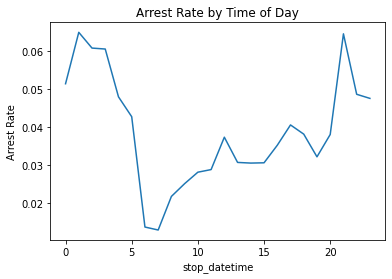

In [ ]:
# Add the xlabel, ylabel, and title
plt.xlabel('Hout')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

#Display the plot
plt.show()

# Are drug-related stops on the rise?
## Plotting drug-related stops

In [ ]:
# Calculate the anuual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [ ]:
# Save the annual rate of drug_related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

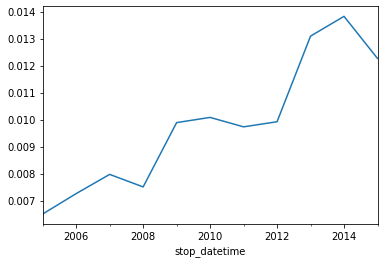

In [ ]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

## Comparing drug and search rates

In [ ]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

In [ ]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

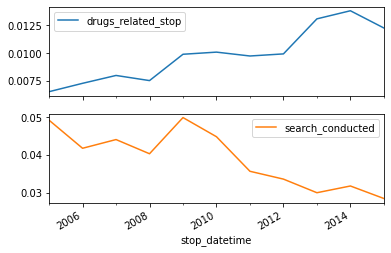

In [ ]:
# Create subplots from 'annual'
annual.plot(subplots=True)

plt.show()

# What violations are caught in each district?
## Tallying violations by district

In [ ]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]


In [ ]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [ ]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1' : 'Zone K3'])

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322

[3 rows x 6 columns]


In [ ]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1' : 'Zone K3']

## Plotting violations by district

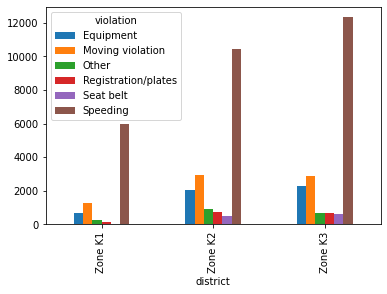

In [ ]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

plt.show()

# How long might you be stopped for violation?
## Converting stop durations to numbers

In [ ]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [ ]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

[ 8 23 45]


## Plotting stop length

In [ ]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


In [ ]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

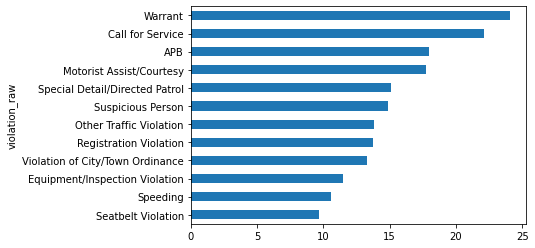

In [ ]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

plt.show()

#**Analyzing the effect of weather on policing**
# Exploring the weather dataset
## Plotting the temperature

In [ ]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv(weather_url)

In [ ]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


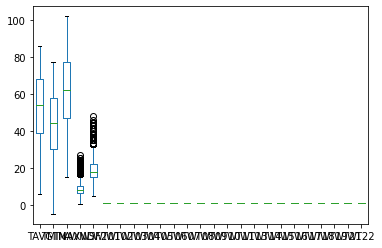

In [ ]:
# Create a box plot of the temperature columns
weather.plot(kind='box')

plt.show()

# Categorizing the weather
## Counting bad weather conditions

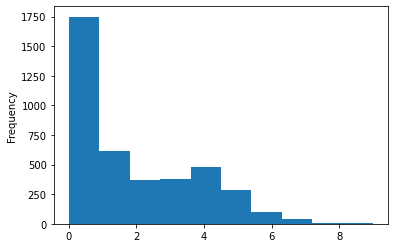

In [ ]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

plt.show()

## Rating the weather conditions

In [ ]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [ ]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


## Changing the data type to category

In [ ]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category')

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [bad, good, worse]


# Merging datasets
## Preparing the DataFrames

In [ ]:
# Reseet the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

        stop_datetime   stop_date stop_time  ... district  frisk stop_minutes
0 2005-01-04 12:55:00  2005-01-04     12:55  ...  Zone X4  False            8
1 2005-01-23 23:15:00  2005-01-23     23:15  ...  Zone K3  False            8
2 2005-02-17 04:15:00  2005-02-17     04:15  ...  Zone X4  False            8
3 2005-02-20 17:15:00  2005-02-20     17:15  ...  Zone X1  False           23
4 2005-02-24 01:20:00  2005-02-24     01:20  ...  Zone X3  False            8

[5 rows x 16 columns]


In [ ]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


## Merging the DataFrames

In [ ]:
# Examine the shape of 'ri'
print(ri.shape)

(86536, 16)


In [ ]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left = ri, right = weather_rating, left_on = 'stop_date', right_on = 'DATE', how= 'left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

(86536, 18)


In [ ]:
# Set 'stop_datetime' as the index of 'ri_weathre'
ri_weather.set_index('stop_datetime', inplace=True)

# Does weather affect the arrest rate?
## Comparing arrest rates by weather rate?

In [ ]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


In [ ]:
# Calculate the arrest rate for each ' rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
bad      0.036261
good     0.033715
worse    0.041667
Name: is_arrested, dtype: float64


In [ ]:
# Calculate the arrest rate for reach 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            bad       0.066311
                     good      0.059007
                     worse     0.097357
Moving violation     bad       0.058050
                     good      0.056227
                     worse     0.065860
Other                bad       0.087443
                     good      0.076966
                     worse     0.062893
Registration/plates  bad       0.098160
                     good      0.081574
                     worse     0.115625
Seat belt            bad       0.022493
                     good      0.028587
                     worse     0.000000
Speeding             bad       0.013314
                     good      0.013405
                     worse     0.016886
Name: is_arrested, dtype: float64


## Selecting from a multi_index Series 

In [ ]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

print(arrest_rate)

violation            rating
Equipment            bad       0.066311
                     good      0.059007
                     worse     0.097357
Moving violation     bad       0.058050
                     good      0.056227
                     worse     0.065860
Other                bad       0.087443
                     good      0.076966
                     worse     0.062893
Registration/plates  bad       0.098160
                     good      0.081574
                     worse     0.115625
Seat belt            bad       0.022493
                     good      0.028587
                     worse     0.000000
Speeding             bad       0.013314
                     good      0.013405
                     worse     0.016886
Name: is_arrested, dtype: float64


In [ ]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [ ]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
bad      0.013314
good     0.013405
worse    0.016886
Name: is_arrested, dtype: float64


## Reshaping the arrest data



In [ ]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.059007  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076966  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013405  0.016886


In [ ]:
# Create the same DateFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                    bad      good     worse
violation                                        
Equipment            0.066311  0.059007  0.097357
Moving violation     0.058050  0.056227  0.065860
Other                0.087443  0.076966  0.062893
Registration/plates  0.098160  0.081574  0.115625
Seat belt            0.022493  0.028587  0.000000
Speeding             0.013314  0.013405  0.016886
